### Magics

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

%load_ext watermark
%watermark -a 'Salomon Tetelepta' -d -t -v -p tensorflow,numpy,pandas,matplotlib -g

Salomon Tetelepta 2019-10-10 10:41:58 

CPython 3.7.4
IPython 7.7.0

tensorflow 1.14.0
numpy 1.16.4
pandas 0.25.0
matplotlib 3.1.1
Git hash: 2ccb40d1deddbf32c768466d0828bea2135c3317


### Imports

In [8]:
import os
import sys

import numpy as np
import pandas as pd
import logging
import cv2
import pickle
import matplotlib.pyplot as plt

from pathlib import Path

### Settings

In [10]:
# get project path, and flag if script runs in a file
project_path = Path(os.getcwd(), os.pardir)
output_path = project_path / "output"

# add project root to pythonpath
sys.path.insert(0, str(project_path / "src"))

# import custom packages
from set_cardgame.identify import identify_images
from set_cardgame.utils import setup_logger, to_rgb3, read_image_with_cards, plot_images

logger = setup_logger(level=logging.INFO)

### Identify images

In [16]:
# path to test images
test_images_path = project_path / "test_images"

# read test image
image_name = "IMG_6136.JPG"
img1 = read_image_with_cards(test_images_path / image_name, convert_to_rgb=True)

# identify the different cards from the image, returns bounding boxes and intermediate steps for plotting
identified_cards, bboxes, rejected_bboxes, intermediate_steps = identify_images(img1, target_size=(128, 96))

# print nr of found cards
nr_found_cards = len(identified_cards)
print(f"number of cards found: {nr_found_cards}")
print(f"number of rejected contours: {len(rejected_bboxes)}")

2019-10-10 10:46:46,625 - INFO - identify - found OTSU threshold: 133.0
2019-10-10 10:46:46,635 - INFO - identify - reject contour, invalid ratio short/long side: 0.4690265486725664


number of cards found: 12
number of rejected contours: 1


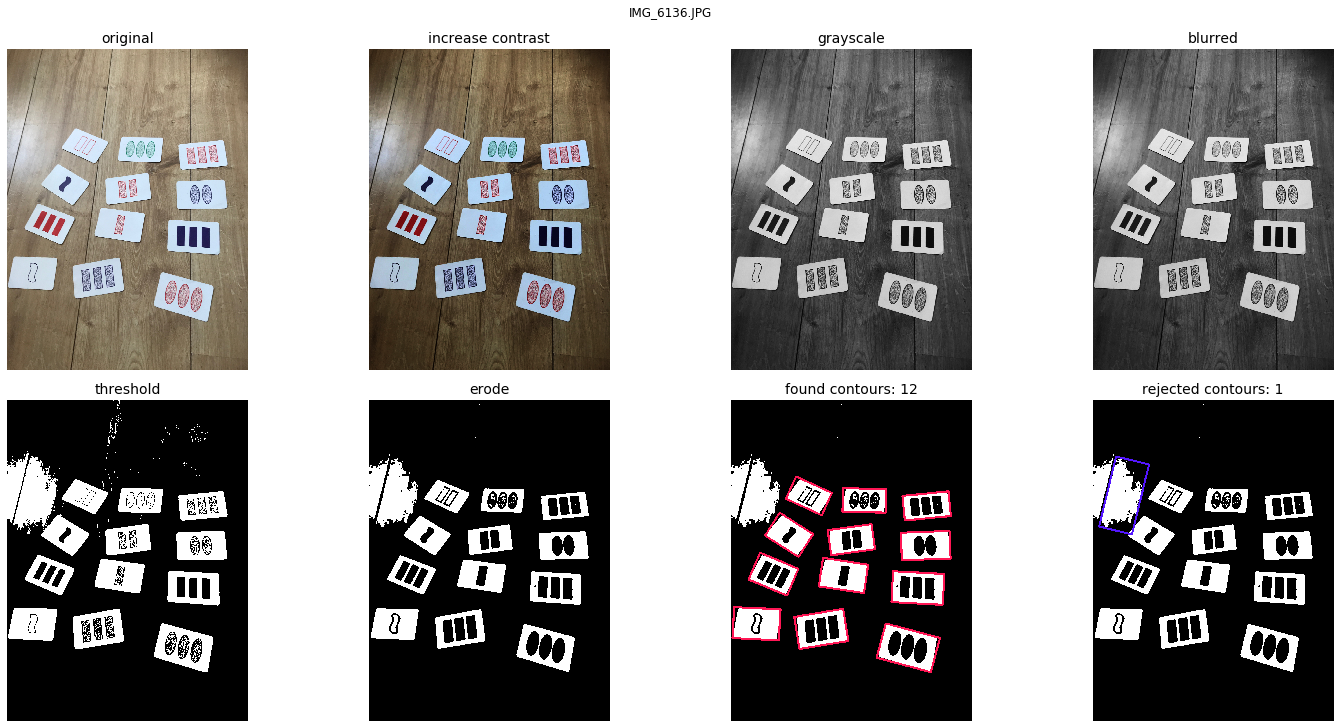

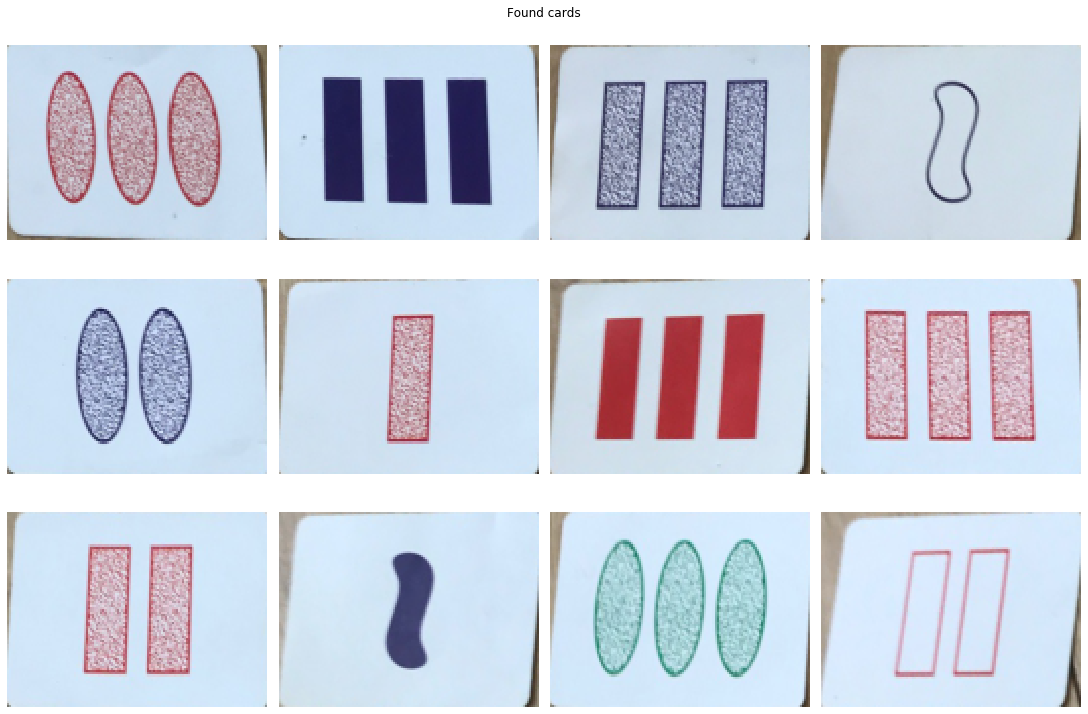

In [17]:
# plot found and rejected contours
img_contours = cv2.drawContours(to_rgb3(intermediate_steps[-1]), bboxes, -1, (255, 22, 84), 12)
img_contours_rejected = cv2.drawContours(to_rgb3(intermediate_steps[-1]), rejected_bboxes, -1, (84, 22, 255), 12)

# prepare list of images for pre-processing subplot
images_to_plot = [img1] + intermediate_steps + [img_contours, img_contours_rejected]

# plot all intermediate pre-processing steps
fig = plot_images(images_to_plot, suptitle=image_name, titles=["original", "increase contrast", "grayscale", "blurred", "threshold", "erode", f"found contours: {len(bboxes)}", f"rejected contours: {len(rejected_bboxes)}"], ncols=4, figsize=(20, 10))

# plot found cards
fig = plot_images(identified_cards, suptitle=f"Found cards", titles=[], ncols=4, figsize=(15, 10))